In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
df = pd.read_csv('Iris.csv')

## Initial Data Exploration

### View the first few rows:

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### View the last few rows:

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Check basic info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Summary statistics:

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Check for missing values:

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### See column names:

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Understand the Target Variable

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Plot histograms:

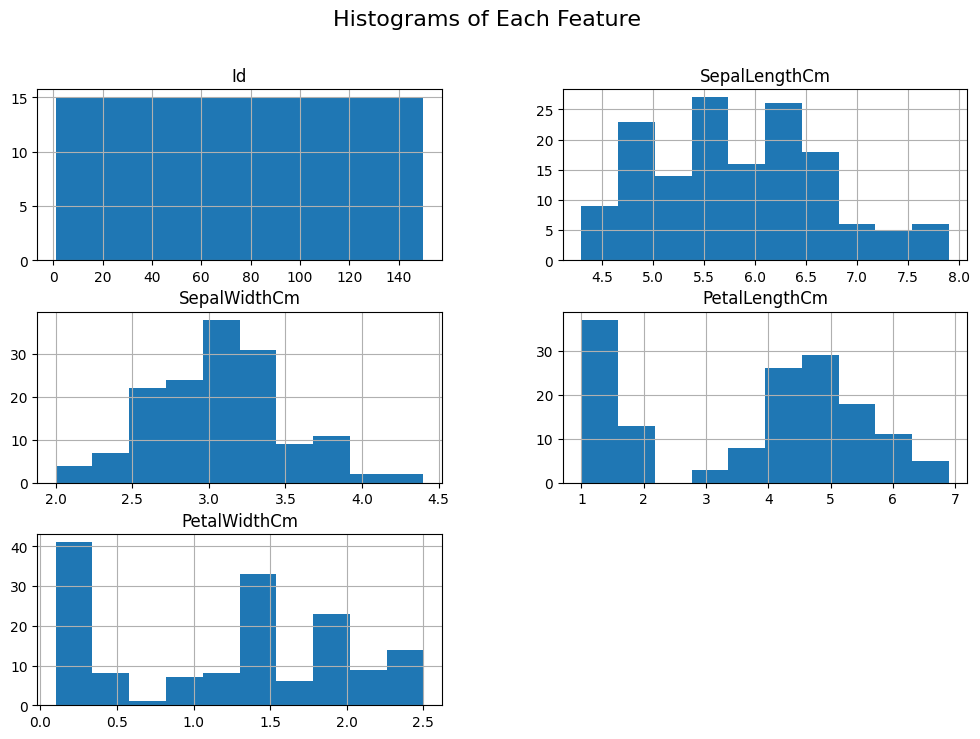

In [10]:
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Each Feature', fontsize=16)
plt.show()

## Observation:

### Sepal Length and Sepal Width are fairly normally distributed but with slight skewness.
### Petal Length and Petal Width show a more distinct separation — Petal measurements cluster into groups, suggesting potential class separability.

## Boxplots for each feature:

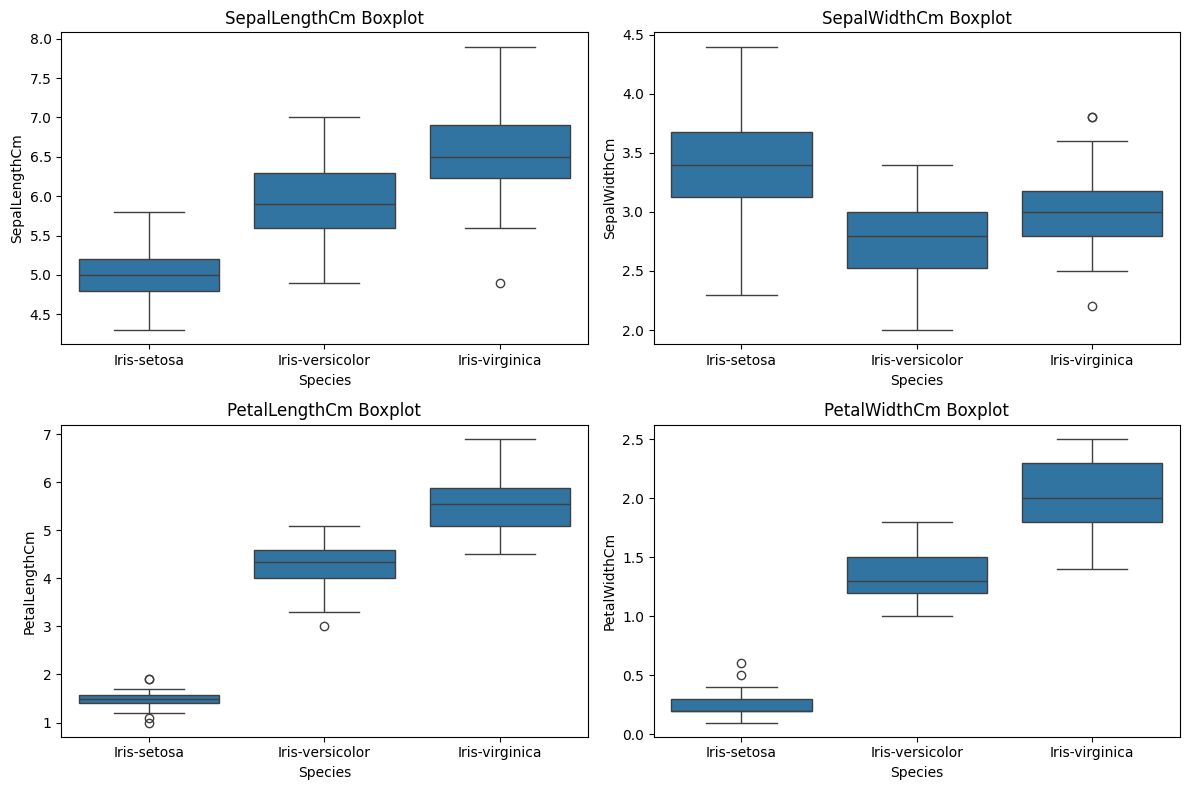

In [11]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[1:5], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

## Observation:

### Sepal Length: Setosa has lower sepal length compared to Versicolor and Virginica.
### Sepal Width: Setosa shows higher sepal width compared to the other two species.
### Petal Length: Setosa is distinctly separate with smaller petal length.Versicolor and Virginica have overlapping ranges but Virginica tends to have longer petals.
### Petal Width:Clear separation: Setosa has the smallest petal width; Virginica has the largest.

## Pairplot:

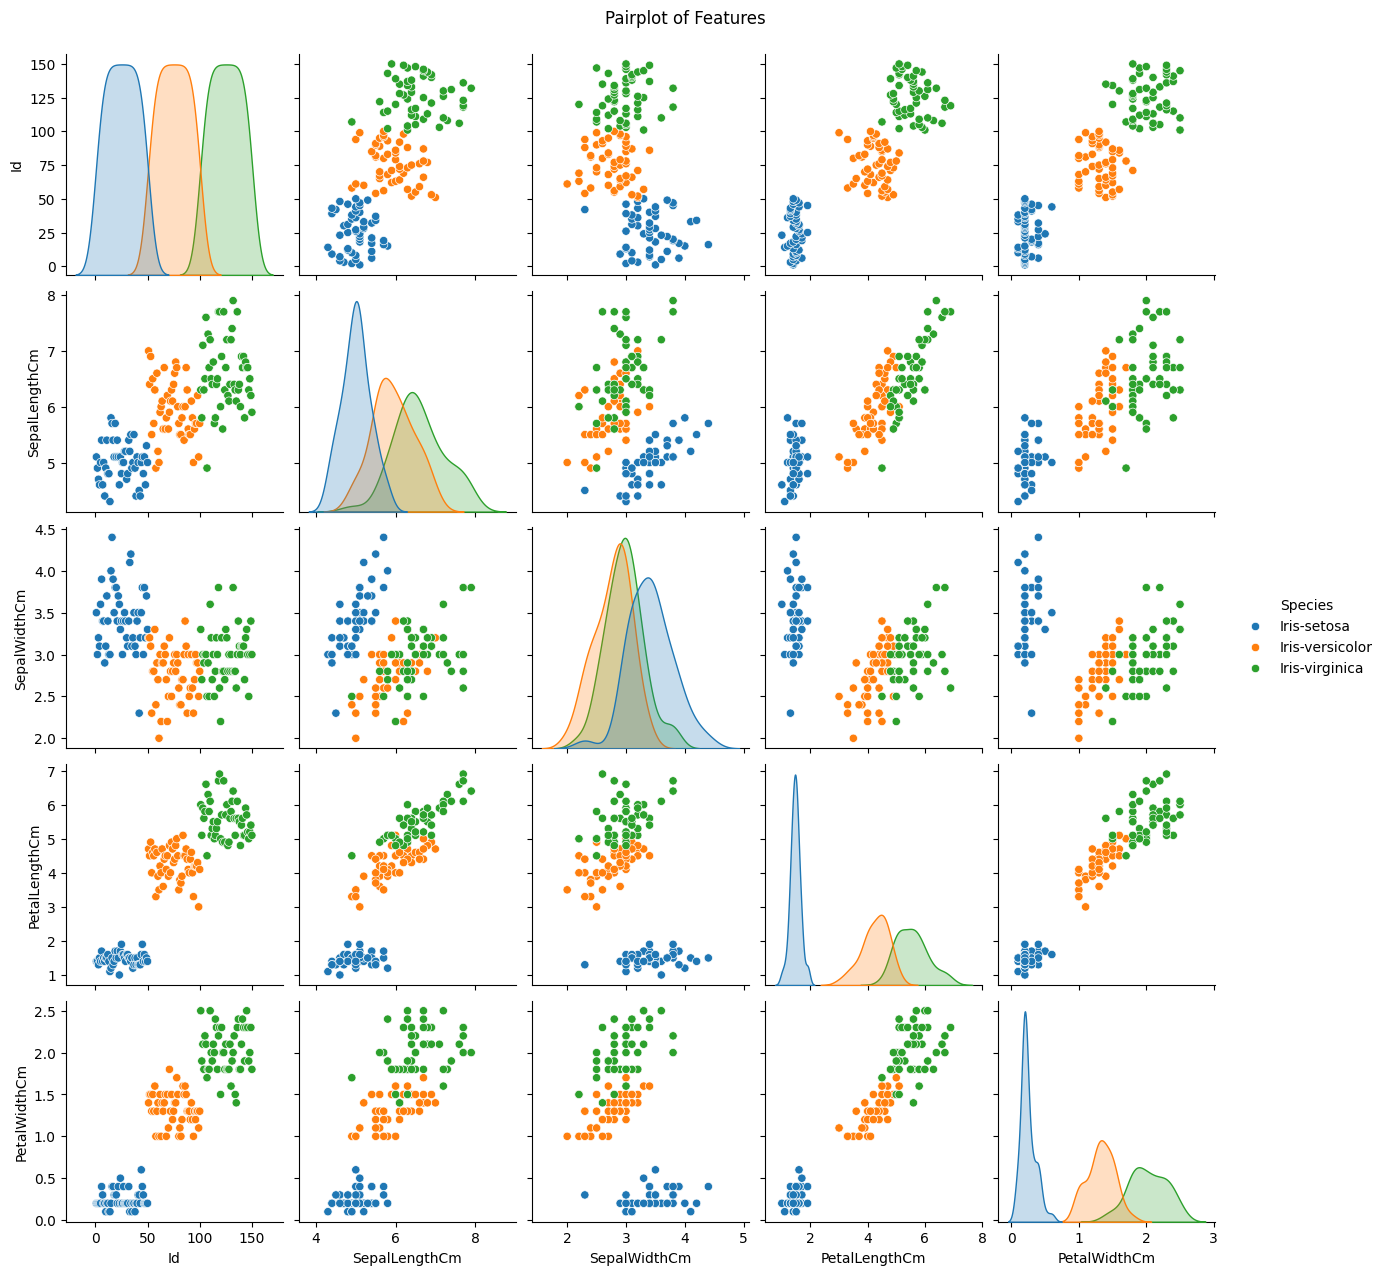

In [12]:
sns.pairplot(df, hue="Species", diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

## Observation:

### Petal Length vs Petal Width: Very strong separation between species.
### Sepal Length and Sepal Width: Less clear separation, especially between Versicolor and Virginica.
### Overall: Setosa is easily distinguishable from the others based on almost all feature combinations.Versicolor and Virginica show some overlap but can still be separated reasonably using petal measurements.

## Correlation Heatmap:

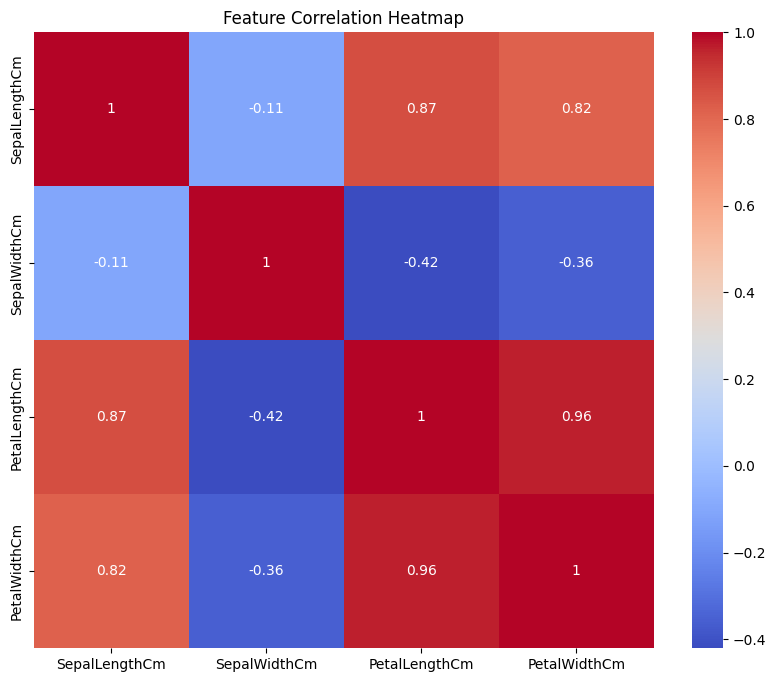

In [13]:
plt.figure(figsize=(10, 8))
corr = df.iloc[:, 1:5].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Observation:

### Petal Length and Petal Width have a very high positive correlation (~0.96).
### Sepal Width has weak negative correlation with Petal Length and Width.
### Sepal Length is moderately correlated with Petal Length.
### Strong correlations suggest that Petal Length and Petal Width are key differentiators.

## Scatterplots for Important Relations

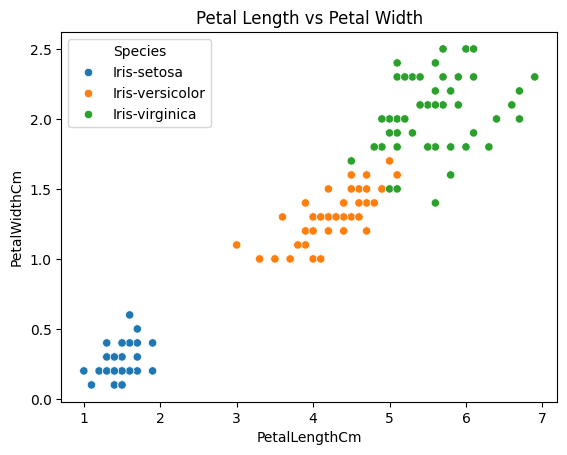

In [14]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

## Observation:

### Very clear clusters are visible: Setosa forms a separate tight cluster. Versicolor and Virginica show slight overlap but are largely distinguishable.
### The relationship between Petal Length and Petal Width is almost linear within species.